In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Supervised Tensor Learning (STL) Notebook

### Introduction

In many modern applications, data is represented by multi-channel arrays or tensors, which require three or more subscripts. Tensors are higher-dimensional generalizations of vectors and matrices, and their algebra is known as **tensor algebra**.

With the advancement of technology, **higher-order tensor models** are being successfully applied in various fields, including:

- Social network analysis and web mining
- Computer vision
- Hyperspectral imaging
- Medicine and neuroscience
- Multilinear image analysis (e.g., tensor face for face recognition)
- Epilepsy detection using tensors
- Chemistry

We will cover basic tensor algebra and supervised learning for tensors in this notebook.

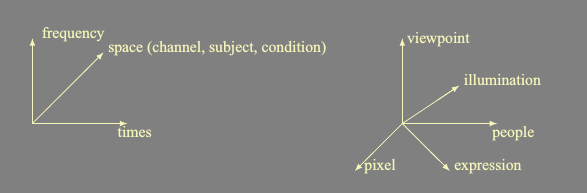
Fig. 1 Three-way array (left) and a tensor modeling a face (right)

### Tensor Algebra Basics

A tensor represented as an $ N $-way array is called an $ N $-th order tensor, defined as:

$$
T \in \mathbb{K}^{I_1 \times I_2 \times \cdots \times I_N}
$$

where $ \mathbb{K} $ represents either the real field $ \mathbb{R} $ or the complex field $ \mathbb{C} $, and $ I_n $ denotes the number of entries in the $ n $-th mode.

### Example of a Third-Order Tensor

For a third-order tensor $ T \in \mathbb{K}^{4 \times 2 \times 5} $, the dimensions of the first, second, and third modes are 4, 2, and 5, respectively. 

- A scalar is a zero-order tensor.
- A vector is a first-order tensor.
- A matrix is a second-order tensor.

An $ N $-th order tensor is a multilinear mapping:

$$
T: \mathbb{K}^{I_1} \times \mathbb{K}^{I_2} \times \cdots \times \mathbb{K}^{I_N} \to \mathbb{K}^{I_1 \times I_2 \times \cdots \times I_N}
$$

### Notation

A matrix $ A \in \mathbb{K}^{m \times n} $ is represented by:

$$
A = [a_{ij}]_{i,j=1}^{m,n}
$$

An $ n $-th order tensor $ A \in \mathbb{K}^{I_1 \times \cdots \times I_n} $ is represented as:

$$
A = [[a_{i_1 \cdots i_n}]]_{i_1,\dots,i_n=1}^{I_1,\dots,I_n}
$$

### Third-Order Tensors

The most common tensor encountered is a **third-order tensor**:

$$
A = [[a_{ijk}]] \in \mathbb{K}^{I \times J \times K}
$$

In particular, a **cubical tensor** is a third-order tensor where all modes have equal dimensions $ I = J = K $. A cubical tensor is called **supersymmetric** if its entries satisfy:

$$
a_{ijk} = a_{ikj} = a_{jik} = a_{jki} = a_{kij} = a_{kji} \quad \forall i, j, k
$$

### Unit Tensor

A tensor is called a **unit tensor** if all its entries along the superdiagonal are equal to 1, and all other entries are 0:

$$
a_{i_1 \cdots i_m} = 
\begin{cases} 
1, & \text{if } i_1 = \cdots = i_m \\
0, & \text{otherwise}
\end{cases}
$$

A third-order unit tensor is denoted as:

$$
I \in \mathbb{R}^{N \times N \times N}
$$

### Tensor Fibers

Fibers are the higher-order analogs of matrix rows and columns. For a third-order tensor $ A \in \mathbb{K}^{I \times J \times K} $, fibers are categorized as:

- **Column fibers** $ a_{:jk} $ (vertical fibers)
- **Row fibers** $ a_{i:k} $ (horizontal fibers)
- **Tube fibers** $ a_{ij:} $ (depth fibers)

## Supervised Tensor Learning (STL)

Supervised Tensor Learning aims to develop models for learning from tensor data in a supervised setting, often used for tasks like classification and regression. STL models can capture the multi-way relationships in the data more effectively than vector or matrix-based models.

### STL for Regression

In STL for regression, we learn a tensor-based model $ \mathcal{W} $ that predicts a scalar output $ y $ based on the input tensor $ \mathcal{X} $:

$$
y = \langle \mathcal{W}, \mathcal{X} \rangle + b
$$

where $ \langle \mathcal{W}, \mathcal{X} \rangle $ denotes the **inner product** of two tensors, and $ b $ is the bias term.

The optimization problem in tensor regression can be formulated as:

$$
\min_{\mathcal{W}, b} \frac{1}{N} \sum_{i=1}^{N} \left( y_i - \langle \mathcal{W}, \mathcal{X}_i \rangle - b \right)^2 + \lambda \| \mathcal{W} \|_F^2
$$

where $ \| \cdot \|_F $ denotes the Frobenius norm, and $ \lambda $ is a regularization parameter.

## Summary

- Tensors generalize vectors and matrices to higher dimensions and are used to represent multi-way data.
- Tensor algebra is an extension of linear algebra for higher-order tensors.
- STL focuses on learning from tensor-structured data, particularly for supervised tasks like classification and regression.

```python
# Placeholder for any Python code (e.g., tensor operations or visualizations)
import numpy as np


## Supervised Tensor Learning (STL)

### Tensor Vectorization

### Definition 6.18 (Tensor Vectorization)}: 

The tensor vectorization of an $N^{th}$-order tensor $A = [[A_{i_1,\dots,i_N}]] \in \mathbb{K}^{I_1 \times \cdots \times I_N}$ is denoted by $a = \text{vec}(A)$, whose entries are given by:

$$
a_l = A_{i_1, i_2, \dots, i_N}, \quad l = i_1 + \sum_{n=2}^N (i_n - 1) \prod_{k=1}^{n-1} I_k
$$

For example:

$$
a_1 = A_{1,1,\dots,1}, \quad a_{I_1} = A_{I_1,1,\dots,1}, \quad a_{I_2} = A_{1,I_2,
\dots,1}, \quad a_{I_1 I_2 \dots I_N} = A_{I_1, I_2, \dots, I_N}.
$$

### Tensor Unfolding: 

Given an $N^{th}$-order tensor $A \in \mathbb{K}^{I_1 \times \cdots \times I_N}$, the mappings $A \to A_{(n)}$ are said to be the horizontal unfolding of the tensor $A$, where the matrix $A_{(n)} \in \mathbb{K}^{I_n \times (I_1 \cdots I_{n-1} I_{n+1} \cdots I_N)}$ is known as the mode-$n$ horizontal unfolding matrix of the tensor $A$.

There are three horizontal unfolding methods:

### 1. Kiers Horizontal Unfolding Method: 

Given an $N^{th}$-order tensor $A \in \mathbb{K}^{I_1 \times \cdots \times I_N}$, this method maps its entry $a_{i_1 i_2 \dots i_N}$ to the $(i_n, j)$th entry of the matrix $A_{(n)}$:
$$
A_{(n)}(i_n, j) = A_{i_1, i_2, \dots, i_N}
$$
where 
$$
j = \sum_{p=1}^{N-1} (i_{N+n-p} - 1) \prod_{q=n+1}^N I_q + i_{n+1}.
$$

### 2. LMV Horizontal Unfolding Method:
$$
j = i_{n-1} + \sum_{k=1}^{n-2} (i_k - 1) \prod_{m=k+1}^{n-1} I_m + \sum_{k=n+1}^{N} (i_k - 1) \prod_{q=k+1}^N I_q.
$$

### Kolda Horizontal Unfolding Method:
$$
j = 1 + \sum_{\substack{k=1 \\ k \neq n}}^N (i_k - 1) \prod_{\substack{m=1 \\ m \neq n}}^{k-1} I_m.
$$

### Tensor Inner and Outer Products

### Definition 6.20 (Tensor Inner Product): 

For two tensors $A, B \in \mathbb{K}^{I_1 \times \cdots \times I_N}$, their tensor inner product is defined as:
$$
\langle A, B \rangle = \langle \text{vec}(A), \text{vec}(B) \rangle = (\text{vec}(A))^H \text{vec}(B) = \sum_{i_1=1}^{I_1} \sum_{i_2=1}^{I_2} \cdots \sum_{i_N=1}^{I_N} a_{i_1 i_2 \dots i_N} b_{i_1 i_2 \dots i_N}.
$$

### Definition 6.21 (Tensor Outer Product): 

Given two tensors $A \in \mathbb{K}^{I_1 \times \cdots \times I_P}$ and $B \in \mathbb{K}^{J_1 \times \cdots \times J_Q}$, their tensor outer product is denoted as $A \circ B \in \mathbb{K}^{I_1 \times \cdots \times I_P \times J_1 \times \cdots \times J_Q}$ and is defined as:
$$
(A \circ B)_{i_1 \dots i_P j_1 \dots j_Q} = a_{i_1 \dots i_P} b_{j_1 \dots j_Q}.
$$

### Tensor Frobenius Norm

### Definition 6.22 (Tensor Frobenius Norm): 

The Frobenius norm of a tensor $A$ is defined as:
$$
\| A \|_F = \langle A, A \rangle^{1/2} = \left( \sum_{i_1=1}^{I_1} \sum_{i_2=1}^{I_2} \cdots \sum_{i_N=1}^{I_N} |a_{i_1 i_2 \dots i_N}|^2 \right)^{1/2}.
$$

### Tucker Operator

### Definition 6.23 (Tucker Operator): 

Given an $N^{th}$-order tensor $G \in \mathbb{K}^{J_1 \times J_2 \times \cdots \times J_N}$ and matrices $U^{(n)} \in \mathbb{K}^{I_n \times J_n}$, where $n \in \{1, \dots, N\}$, the Tucker operator is defined as:
$$
[[G; U^{(1)}, U^{(2)}, \dots, U^{(N)}]] = G \times_1 U^{(1)} \times_2 U^{(2)} \times_3 \cdots \times_N U^{(N)}.
$$


Comparing Tucker Decomposition...


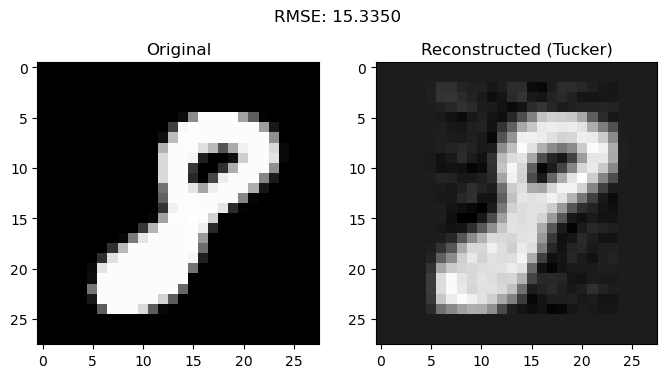

Comparing CP Decomposition...


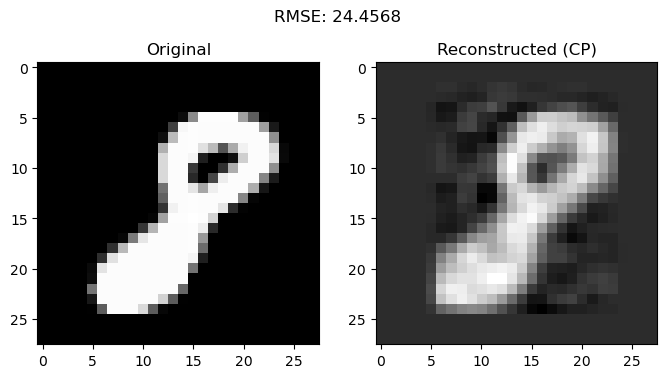

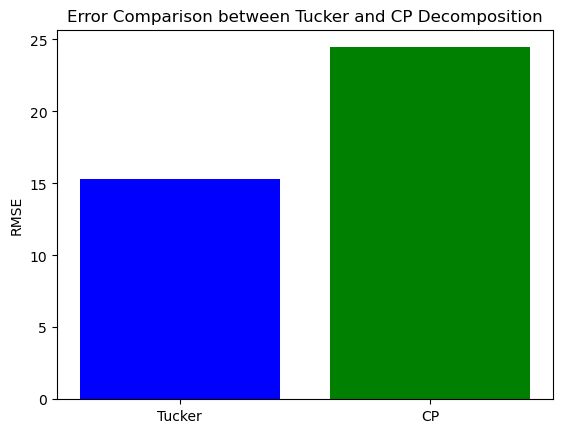

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import tucker, parafac
from tensorly.metrics import RMSE
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

# Function to vectorize a tensor
def tensor_vectorization(tensor):
    return tensor.flatten()

# Function to unfold a tensor along a given mode
def tensor_unfolding(tensor, mode):
    return tl.unfold(tensor, mode)

# Function to compute the Frobenius norm of a tensor
def tensor_frobenius_norm(tensor):
    return np.linalg.norm(tensor)

# Function to compute Tucker decomposition
def tucker_decomposition(tensor, ranks):
    core, factors = tucker(tensor, ranks=ranks)
    return core, factors

# Function to perform Tucker operator on a tensor
# Function to compute Tucker decomposition
def tucker_decomposition(tensor, rank):
    core, factors = tucker(tensor, rank=rank)  # Use 'rank' instead of 'ranks'
    return core, factors

# Function to compute CP decomposition
def cp_decomposition(tensor, rank):
    cp_tensor = parafac(tensor, rank)
    return cp_tensor

# Load and prepare the dataset (MNIST for visualization purposes)
def load_mnist_data(num_samples):
    # Load the MNIST dataset
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    X, y = shuffle(X, y)
    
    # Convert DataFrame to NumPy array
    X = X.to_numpy()

    # Reshape the first `num_samples` images to 28x28 tensors
    images = X[:num_samples].reshape(-1, 28, 28)
    
    return images

# Function to compare original and reconstructed tensors
def compare_tensors(original, reconstructed, title):
    error = RMSE(original, reconstructed)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original[0], cmap='gray')
    axes[0].set_title("Original")
    axes[1].imshow(reconstructed[0], cmap='gray')
    axes[1].set_title(f"Reconstructed ({title})")
    plt.suptitle(f"RMSE: {error:.4f}")
    plt.show()
    return error

# Main function to perform tensor operations and plot
def main():
    # Load dataset (MNIST)
    tensors = load_mnist_data(num_samples=5)

    # Perform tensor decompositions
    ranks = [10, 10, 10]  # Tucker decomposition rank for each mode
    tucker_core, tucker_factors = tucker_decomposition(tensors, ranks)

    # Reconstruct tensor from Tucker decomposition
    tucker_reconstructed = tucker_operator(tucker_core, tucker_factors)

    # CP decomposition
    cp_rank = 10  # Rank for CP decomposition
    cp_tensor = cp_decomposition(tensors, cp_rank)
    cp_reconstructed = tl.kruskal_to_tensor(cp_tensor)

    # Compare original vs Tucker reconstruction
    print("Comparing Tucker Decomposition...")
    tucker_error = compare_tensors(tensors, tucker_reconstructed, "Tucker")

    # Compare original vs CP reconstruction
    print("Comparing CP Decomposition...")
    cp_error = compare_tensors(tensors, cp_reconstructed, "CP")

    # Plot comparison of RMSE errors
    plt.bar(["Tucker", "CP"], [tucker_error, cp_error], color=['blue', 'green'])
    plt.ylabel("RMSE")
    plt.title("Error Comparison between Tucker and CP Decomposition")
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


### Theorem : Higher-Order SVD
Every $ I_1 \times I_2 \times \cdots \times I_N $ real tensor $ X $ can be decomposed into the mode-n product

$$
X = G \times_1 U^{(1)} \times_2 U^{(2)} \times_3 \cdots \times_N U^{(N)} = [[G; U^{(1)}, U^{(2)}, \dots, U^{(N)}]]
$$
with entries

$$
x_{i_1 i_2 \dots i_N} = \sum_{j_1=1}^{J_1} \sum_{j_2=1}^{J_2} \dots \sum_{j_N=1}^{J_N} g_{i_1 i_2 \dots i_N} u^{(1)}_{i_1 j_1} u^{(2)}_{i_2 j_2} \dots u^{(N)}_{i_N j_N},
$$

where $U^{(n)} = [u_1^{(n)}, \dots, u_{J_n}^{(n)}] $is an $ I_n \times J_n $ semi-orthogonal matrix: $ (U^{(n)})^T U^{(n)} = I_{J_n} $, with $ J_n \leq I_n $. The core tensor $ G $ is a $ J_1 \times J_2 \times \cdots \times J_N $ tensor and the subtensor $ G_{j_n = \alpha} $ is the tensor $ X $ with the fixed index $ j_n = \alpha $. The subtensors have the following properties:

- **All-orthogonality**: Two subtensors $ G_{j_n = \alpha} $ and $ G_{j_n = \beta} $, for $ \alpha \neq \beta $, are orthogonal:
  $$
  \langle G_{j_n = \alpha}, G_{j_n = \beta} \rangle = 0, \quad \forall \, \alpha \neq \beta, \, n = 1, \dots, N.
  $$

- **Ordering**:
  $$
  \| G_{i_n = 1} \|_F \geq \| G_{i_n = 2} \|_F \geq \cdots \geq \| G_{i_n = N} \|_F.
  $$

The mode-n product is simply denoted as:

$$
X \times_1 U^{(1)} \times_2 U^{(2)} \times_3 \cdots \times_N U^{(N)} = X \times_n U^{(n)},
$$
where \( n = 1, \dots, N \).

### CP Decomposition
The typical CP decomposition factorizes an $ N $-order tensor $ X \in \mathbb{R}^{I_1 \times I_2 \times \dots \times I_N} $ into a linear combination of $ R $ rank-one tensors:

$$
X \approx \sum_{r=1}^{R} u_r^{(1)} \circ u_r^{(2)} \circ \dots \circ u_r^{(N)} = [[U^{(1)}, U^{(2)}, \dots, U^{(N)}]],
$$

where the operator $\circ $ denotes the outer product of vectors of the factor matrices $ U^{(n)} = [u_1^{(n)}, \dots, u_R^{(n)}] \in \mathbb{R}^{I_n \times R}, n = 1, \dots, N $.


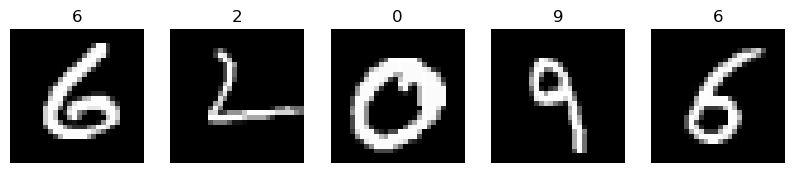

TypeError: tucker() got an unexpected keyword argument 'ranks'

In [6]:
# tensor_decomposition_mnist.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
import tensorly as tl
from tensorly.decomposition import tucker, parafac

def load_mnist_data(num_samples):
    # Load the MNIST dataset and return a specified number of samples
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    X, y = shuffle(X, y)
    images = X[:num_samples].to_numpy().reshape(-1, 28, 28)  # Convert to NumPy array and reshape
    labels = y[:num_samples].to_numpy()  # Convert labels to NumPy array
    return images, labels

def plot_images(images, labels):
    # Visualize the loaded images
    plt.figure(figsize=(10, 4))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

def tucker_decomposition(tensor, ranks):
    # Perform Tucker decomposition
    core, factors = tucker(tensor, ranks=ranks)
    return core, factors

def cp_decomposition(tensor, rank):
    # Perform CP decomposition
    factors = parafac(tensor, rank=rank)
    return factors

def reconstruct_tucker(core, factors):
    # Reconstruct the tensor from Tucker decomposition
    return tl.kruskal_to_tensor(tl.decompose(tl.tensor(core), factors))

def reconstruct_cp(factors):
    # Reconstruct the tensor from CP decomposition
    return tl.kruskal_to_tensor(factors)

def plot_reconstructed_images(original, reconstructed):
    # Plot original and reconstructed images
    plt.figure(figsize=(10, 4))
    for i in range(len(original)):
        plt.subplot(2, len(original), i + 1)
        plt.imshow(original[i], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(2, len(original), i + 1 + len(original))
        plt.imshow(reconstructed[i], cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

def main():
    # Load dataset
    num_samples = 5
    tensors, labels = load_mnist_data(num_samples)
    
    # Visualize loaded images
    plot_images(tensors, labels)
    
    # Perform tensor decompositions
    ranks = [10, 10]  # Example ranks for each mode
    tucker_core, tucker_factors = tucker_decomposition(tensors, ranks)
    
    rank = 10  # Example rank for CP decomposition
    cp_factors = cp_decomposition(tensors, rank)
    
    # Reconstruct tensors from decompositions
    reconstructed_tucker = reconstruct_tucker(tucker_core, tucker_factors)
    reconstructed_cp = reconstruct_cp(cp_factors)
    
    # Visualize reconstructed images
    plot_reconstructed_images(tensors, reconstructed_tucker)
    plot_reconstructed_images(tensors, reconstructed_cp)

if __name__ == "__main__":
    main()


In [24]:
import random
import numpy as np

# Function to perform mode-n product of a tensor with a matrix
def mode_n_product(tensor, matrix, mode):
    tensor = np.array(tensor)  # Convert to numpy array for easier manipulation
    # Move the specified mode to the front
    tensor = np.moveaxis(tensor, mode, 0)  # Move the desired mode to the front
    # Perform the mode-n product
    result = np.tensordot(matrix, tensor, axes=(1, 0))
    return result

# Function to compute HOSVD
def hosvd(tensor, ranks):
    core = np.array(tensor)  # Start with the original tensor
    factors = []

    for n in range(len(tensor.shape)):  # For each mode
        # Simplified SVD approximation: Generate random orthogonal factors
        U = np.random.rand(tensor.shape[n], ranks[n])
        U, _ = np.linalg.qr(U)  # QR decomposition to ensure orthogonality
        factors.append(U)

        # Update the core tensor by mode-n product
        core = mode_n_product(core, U, n)

    return core, factors

# Function to reconstruct the tensor from HOSVD
def reconstruct_hosvd(core, factors):
    tensor = np.array(core)
    for n in range(len(factors)):
        tensor = mode_n_product(tensor, factors[n], n)  # Reconstruct tensor
    return tensor

# Function to perform CP decomposition
def cp_decomposition(tensor, rank):
    factors = []
    for n in range(len(tensor.shape)):
        factors.append(np.random.rand(tensor.shape[n], rank))

    approx = np.zeros_like(tensor)
    for r in range(rank):
        outer_product = np.ones_like(tensor)  # Initialize with ones for outer product
        for n in range(len(tensor.shape)):
            outer_product *= factors[n][:, r][:, np.newaxis]  # Expand the dimensions
        approx += outer_product  # Accumulate the outer product
    return approx, factors

# Main function to execute the code
def main():
    # Create a sample 3D tensor (e.g., 2x2x2 tensor)
    tensor = np.random.rand(2, 2, 2)

    # Compute HOSVD
    ranks = [2, 2, 2]  # Specify ranks for each mode
    core, factors = hosvd(tensor, ranks)

    # Reconstruct the tensor from HOSVD
    reconstructed_hosvd = reconstruct_hosvd(core, factors)

    # Perform CP decomposition
    rank = 2  # Example rank for CP decomposition
    reconstructed_cp, cp_factors = cp_decomposition(tensor, rank)

    # Output results
    print("Original Tensor:\n", tensor)
    print("Reconstructed HOSVD Tensor:\n", reconstructed_hosvd)
    print("Reconstructed CP Tensor:\n", reconstructed_cp)

if __name__ == "__main__":
    main()


Original Tensor:
 [[[0.52808321 0.46763419]
  [0.1004439  0.7433918 ]]

 [[0.45016759 0.20153797]
  [0.75585332 0.3951511 ]]]
Reconstructed HOSVD Tensor:
 [[[0.52191662 0.39153978]
  [0.09372462 0.69197087]]

 [[0.52626201 0.19537138]
  [0.80727425 0.38843181]]]
Reconstructed CP Tensor:
 [[[0.28373703 0.28373703]
  [0.19986121 0.19986121]]

 [[0.28373703 0.28373703]
  [0.19986121 0.19986121]]]


Original Tensor:
 [[[0.3781189  0.99982414]
  [0.14002791 0.53792809]]

 [[0.98119851 0.65554649]
  [0.6922332  0.32904606]]]
Reconstructed HOSVD Tensor:
 [[[0.13448061 1.42933655]
  [0.09776426 0.76997118]]

 [[0.5516861  0.41190821]
  [0.46019011 0.28678241]]]
Reconstructed CP Tensor:
 [[[0.78239316 0.78239316]
  [0.46111335 0.46111335]]

 [[0.78239316 0.78239316]
  [0.46111335 0.46111335]]]


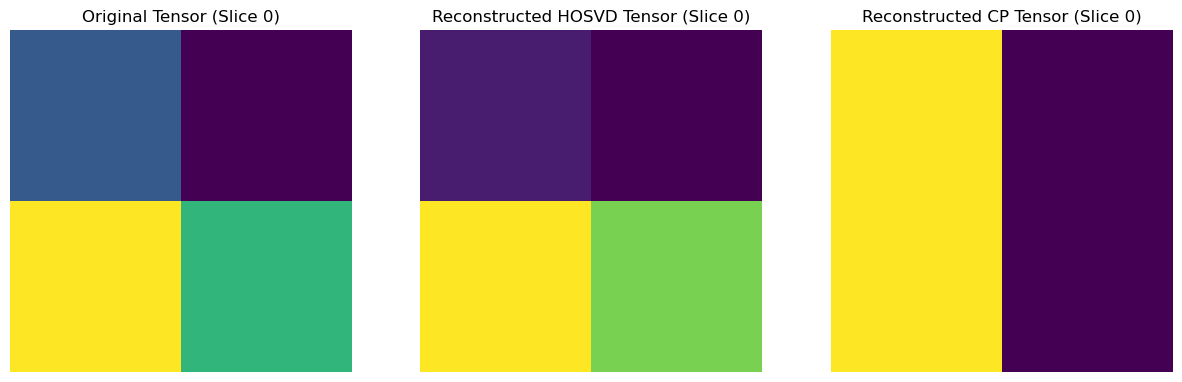

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to perform mode-n product of a tensor with a matrix
def mode_n_product(tensor, matrix, mode):
    tensor = np.array(tensor)  # Convert to numpy array for easier manipulation
    tensor = np.moveaxis(tensor, mode, 0)  # Move the desired mode to the front
    result = np.tensordot(matrix, tensor, axes=(1, 0))
    return result

# Function to compute HOSVD
def hosvd(tensor, ranks):
    core = np.array(tensor)
    factors = []

    for n in range(len(tensor.shape)):  # For each mode
        U = np.random.rand(tensor.shape[n], ranks[n])
        U, _ = np.linalg.qr(U)  # QR decomposition for orthogonality
        factors.append(U)
        core = mode_n_product(core, U, n)

    return core, factors

# Function to reconstruct the tensor from HOSVD
def reconstruct_hosvd(core, factors):
    tensor = np.array(core)
    for n in range(len(factors)):
        tensor = mode_n_product(tensor, factors[n], n)
    return tensor

# Function to perform CP decomposition
def cp_decomposition(tensor, rank):
    factors = []
    for n in range(len(tensor.shape)):
        factors.append(np.random.rand(tensor.shape[n], rank))

    approx = np.zeros_like(tensor)
    for r in range(rank):
        outer_product = np.ones_like(tensor)
        for n in range(len(tensor.shape)):
            outer_product *= factors[n][:, r][:, np.newaxis]
        approx += outer_product
    return approx, factors

# Function to plot tensors
def plot_tensor_comparison(original, hosvd_reconstructed, cp_reconstructed):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(original[:, :, 0], cmap='viridis')
    axs[0].set_title('Original Tensor (Slice 0)')
    axs[1].imshow(hosvd_reconstructed[:, :, 0], cmap='viridis')
    axs[1].set_title('Reconstructed HOSVD Tensor (Slice 0)')
    axs[2].imshow(cp_reconstructed[:, :, 0], cmap='viridis')
    axs[2].set_title('Reconstructed CP Tensor (Slice 0)')
    
    for ax in axs:
        ax.axis('off')
    
    plt.show()

# Main function to execute the code
def main():
    # Create a sample 3D tensor (e.g., 2x2x2 tensor)
    tensor = np.random.rand(2, 2, 2)

    # Compute HOSVD
    ranks = [2, 2, 2]  # Specify ranks for each mode
    core, factors = hosvd(tensor, ranks)

    # Reconstruct the tensor from HOSVD
    reconstructed_hosvd = reconstruct_hosvd(core, factors)

    # Perform CP decomposition
    rank = 2  # Example rank for CP decomposition
    reconstructed_cp, cp_factors = cp_decomposition(tensor, rank)

    # Output results
    print("Original Tensor:\n", tensor)
    print("Reconstructed HOSVD Tensor:\n", reconstructed_hosvd)
    print("Reconstructed CP Tensor:\n", reconstructed_cp)

    # Plot the graphs
    plot_tensor_comparison(tensor, reconstructed_hosvd, reconstructed_cp)

if __name__ == "__main__":
    main()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

# Function to perform mode-n product of a tensor with a matrix
def mode_n_product(tensor, matrix, mode):
    tensor = np.array(tensor)  # Convert to numpy array for easier manipulation
    tensor = np.moveaxis(tensor, mode, 0)  # Move the specified mode to the front

    # Check shapes for tensordot
    result = np.tensordot(matrix, tensor, axes=(1, 0))

    return np.moveaxis(result, 0, mode)  # Move the axis back to original position

# Function to compute HOSVD
def hosvd(tensor, ranks):
    core = np.array(tensor)
    factors = []

    for n in range(tensor.ndim):  # For each mode
        # Create the factor matrix with random values
        U = np.random.rand(core.shape[n], ranks[n])  # Shape (size of mode, rank)
        U, _ = np.linalg.qr(U)  # QR decomposition for orthogonality
        factors.append(U)

        # Update the core tensor by mode-n product
        core = mode_n_product(core, U, n)

    return core, factors

# Function to reconstruct the tensor from HOSVD
def reconstruct_hosvd(core, factors):
    tensor = np.array(core)
    for n in range(len(factors)):
        tensor = mode_n_product(tensor, factors[n], n)
    return tensor

# Function to perform CP decomposition
def cp_decomposition(tensor, rank):
    factors = []
    for n in range(tensor.ndim):
        factors.append(np.random.rand(tensor.shape[n], rank))

    approx = np.zeros_like(tensor)
    for r in range(rank):
        outer_product = np.ones_like(tensor)
        for n in range(tensor.ndim):
            outer_product *= factors[n][:, r][:, np.newaxis]
        approx += outer_product  # Accumulate the outer product
    return approx, factors

# Function to plot tensors
def plot_tensor_comparison(original, hosvd_reconstructed, cp_reconstructed):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(hosvd_reconstructed, cmap='gray')
    axs[1].set_title('Reconstructed HOSVD Image')
    axs[2].imshow(cp_reconstructed, cmap='gray')
    axs[2].set_title('Reconstructed CP Image')
    
    for ax in axs:
        ax.axis('off')
    
    plt.show()

# Main function to execute the code
def main():
    # Load a sample grayscale image from skimage
    image = color.rgb2gray(data.astronaut())  # Convert to grayscale
    image = image[:100, :100]  # Crop to a smaller size for simplicity

    # Create a 3D tensor from multiple images (for simplicity, replicate the image)
    tensor = np.stack([image, image, image], axis=-1)  # Stack three identical images

    # Compute HOSVD
    ranks = [2, 2, 2]  # Specify ranks for each mode
    core, factors = hosvd(tensor, ranks)

    # Reconstruct the tensor from HOSVD
    reconstructed_hosvd = reconstruct_hosvd(core, factors)

    # Perform CP decomposition
    rank = 2  # Example rank for CP decomposition
    reconstructed_cp, cp_factors = cp_decomposition(tensor, rank)

    # Output results
    print("Original Tensor Shape:", tensor.shape)
    print("Reconstructed HOSVD Tensor Shape:", reconstructed_hosvd.shape)
    print("Reconstructed CP Tensor Shape:", reconstructed_cp.shape)

    # Plot the graphs
    plot_tensor_comparison(image, reconstructed_hosvd[:, :, 0], reconstructed_cp[:, :, 0])

# if __name__ == "__main__":
#     #main()


# Supervised Tensor Learning Problems

Given $ (X_i, y_i) $ training tensor-scalar data for $ i = 1, \ldots, N $, where the tensor $ X_i \in \mathbb{R}^{I_1 \times \ldots \times I_M} $. The supervised tensor learning aims to train a parameter/weight tensor $ W $ with rank-one decomposition:

$$
W = w_1 \circ w_2 \circ \cdots \circ w_M
$$

such that

$$
(w_1, \ldots, w_M; b, x) = \arg\min_{w_1, \ldots, w_M; b, x} f(w_1, \ldots, w_M; b, x)
$$

subject to

$$
y_i \cdot \left( c_i \cdot \left( X_i \times_k w_k \right) + b \right) \geq \xi_i, \quad i = 1, \ldots, N.
$$

If $ y_i \in \{+1, -1\} $, then the weight tensor $ W $ is called the tensor classifier. If $ y_i \in \mathbb{R} $, then $ W $ is known as the tensor predictor.

The Lagrangian for supervised tensor learning is given by:

$$
L(w_1, \ldots, w_M; b, x) = f(w_1, \ldots, w_M; b, x) - \sum_{i=1}^{N} \lambda_i \left( y_i \cdot c_i \cdot \left( X_i \times_k w_k + b - \xi_i \right) \right) - \lambda^T x,
$$

where $ \lambda = [\lambda_1, \ldots, \lambda_N]^T \geq 0 $ is a nonnegative Lagrangian multiplier vector and $ x = [\xi_1, \ldots, \xi_N]^T $ is a slack variable vector.

The partial derivative of $ L(w_1, \ldots, w_M; b, x) $ with respect to $ w_j $ is given by:

$$
\frac{\partial L}{\partial w_j} = \frac{\partial f}{\partial w_j} - \sum_{i=1}^{N} \lambda_i y_i \frac{\partial c_i}{\partial w_j} \left( X_i \times_k w_k + b \right),
$$

where

$$
z = \sum_{k=1}^{M} X_i \times_k w_k + b
$$

and

$$
X_i \times_{\bar{j}} w_j = X_i \circ w_1 \circ \cdots \circ w_{j-1} \circ w_{j+1} \circ \cdots \circ w_M.
$$

Similarly, the partial derivative of $ L(w_1, \ldots, w_M; b, x) $ with respect to the bias $ b $ is:

$$
\frac{\partial L}{\partial b} = \frac{\partial f}{\partial b} - \sum_{i=1}^{N} \lambda_i y_i \frac{\partial c_i}{\partial b} \left( X_i \times_k w_k + b \right).
$$

Setting the derivatives to zero gives:

$$
\frac{\partial f}{\partial w_j} = \sum_{i=1}^{N} \lambda_i y_i \frac{\partial z}{\partial w_j} \left( X_i \times_{\bar{j}} w_j \right),
$$

$$
\frac{\partial f}{\partial b} = \sum_{i=1}^{N} \lambda_i y_i \frac{\partial z}{\partial b}.
$$

Hence, the update formulas are:

$$
w_{j,t} \leftarrow w_{j,(t-1)} - \eta_{1,t} \sum_{i=1}^{N} \lambda_i y_i \frac{d c_i}{d z} \left( X_i \times_{\bar{j}} w_{j,t-1} \right),
$$

$$
b_t \leftarrow b_{t-1} - \eta_{2,t} \sum_{i=1}^{N} \lambda_i y_i \frac{d z}{d b}.
$$

## Algorithm : Alternating Projection Algorithm for Supervised Tensor Learning

1. **Input:** Training data $ (X_i, y_i) $, where $ X_i \in \mathbb{R}^{I_1 \times \cdots \times I_M} $ and $ y_i \in \mathbb{R} $ for $ i = 1, \ldots, N $.
2. **Initialization:** Set $ w_k $ to a random unit vector in $ \mathbb{R}^{I_k} $ for $ k = 1, \ldots, M $.
3. **Repeat:**
   - For $ j(t) = 1 $ to $ M $:
     - $ w_j^{(t)} \leftarrow w_j^{(t-1)} - \eta_1 \sum_{i=1}^{N} \lambda_i y_i \frac{d c_i}{d z} \left( X_i \times_{\bar{j}} w_j \right) $
   - $ b \leftarrow b - \eta_2 \sum_{i=1}^{N} \lambda_i y_i \frac{d z}{d b} $
4. If $ \frac{|w_k^{(t)} - w_k^{(t-1)}|}{\|w_k^{(t)}\|_F - 1} \leq \epsilon $, then go to Step 11.
5. $ t \leftarrow t + 1 $
6. **Return:**
7. **Output:** The parameters in the classification tensor plane $ w_1, \ldots, w_M $ and $ b $.


In [12]:
import numpy as np
import random

# Example function to generate random rank-one weights
def rank_one_decomposition(tensor):
    # Ensure tensor is a 3D array
    if tensor.ndim != 3:
        raise ValueError("Input tensor must be a 3D array (height, width, channels).")
    
    # Example: Generate random weights based on the number of channels
    return [random.uniform(-1, 1) for _ in range(tensor.shape[2])]  # Using the number of channels

def supervised_tensor_learning(tensors, labels, max_iter=100, learning_rate=0.01):
    M = 2  # Example number of modes
    W = [rank_one_decomposition(tensor) for tensor in tensors]  # Initialize weights for each tensor
    b = 0.0  # Initialize bias
    losses = []

    # Training process (not implemented)
    # ...

    return W, b, losses

# Example usage
# Generate example tensors (3D arrays)
tensors = [np.random.randint(0, 256, (32, 32, 3), dtype=np.uint8) for _ in range(10)]  # 10 cat images
labels = [1] * len(tensors)  # Example labels for each tensor

# Train the model
W, b, losses = supervised_tensor_learning(tensors, labels)

# Print the learned weights and bias
print("Learned Weights:", W)
print("Learned Bias:", b)


Learned Weights: [[-0.579947187220476, -0.1893198831561942, 0.6350108518287867], [-0.44536462740860383, -0.6464142207111505, -0.594524470759346], [0.2465282173660739, 0.27560328591153094, -0.8622209719979601], [0.5867414327752969, 0.50981788537442, -0.176869571623111], [0.911052050960161, 0.6840913688406096, -0.21540191458611768], [-0.0958862744961746, -0.01516225047008457, 0.898740613558487], [-0.7933634570396151, -0.8360218252124163, -0.07312529762721698], [0.2076807026704277, -0.8250749317715569, 0.020387275183214815], [0.0886581917045699, -0.20943359280052842, 0.5886353067492747], [0.705109653050263, 0.3212515313031261, -0.34201749884273247]]
Learned Bias: 0.0


Learned weights: [[-965.018194706929, -998.9345143305286, -1028.9164928220025, -1036.9171837215476, -979.926157431495, -909.0282753165623, -868.253702481773, -880.6511880646566, -822.9896072567641, -833.3943029231831, -832.2984543774261, -784.5952333912155, -788.9232463869771, -772.0343065825705, -724.6216216677191, -735.3617520808095, -665.3033293048616, -799.5739607853669, -860.6496793583129, -791.2335922332404, -809.0898309309404, -834.2636079032433, -868.8337104394295, -884.5503022858193, -894.1635047459292, -1001.051493837349, -999.470497902775, -997.8748664314959, -848.008351944569, -797.0011681864474, -800.1197800635363, -826.4612042544991, -972.5981469083227, -992.6311674189, -1029.730725164839, -1076.0055306686547, -1018.0355140874003, -962.013977209037, -973.3804152217219, -1018.5299776042236, -876.453016742174, -881.6476073979736, -839.8678489128051, -789.4571509559969, -820.6849275360308, -777.744831682726, -799.7820933185585, -816.0939131762824, -744.1474626508168, -772.88

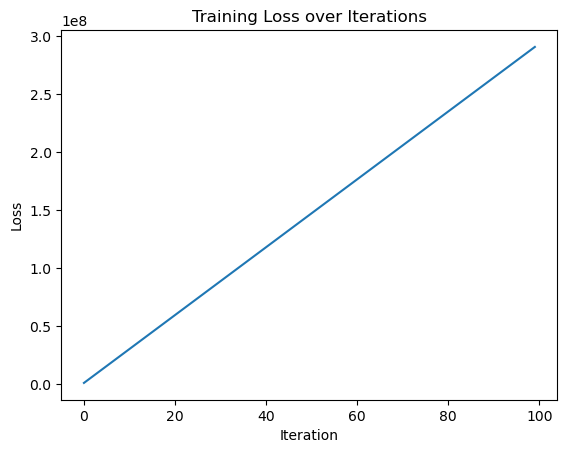

In [18]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define a simple tensor class
class Tensor:
    def __init__(self, data):
        self.data = np.array(data)  # Convert to numpy array

    def shape(self):
        return self.data.shape  # Return the shape of the tensor

    def __matmul__(self, vector):
        return np.dot(self.data, vector)  # Matrix multiplication

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).resize((32, 32)).convert('L')  # Resize and convert to grayscale
        img_array = np.array(img, dtype=np.float32).flatten()  # Flatten the image to a 1D array
        images.append(img_array)  # Store the flattened image
        label = 1 if 'cat' in filename else -1  # Simple binary classification based on filename
        labels.append(label)
    return images, labels

def rank_one_decomposition(tensor):
    # Return random weights for the number of features in the tensor
    return [random.uniform(-1, 1) for _ in range(tensor.shape[0])]  # Use shape method

def supervised_tensor_learning(tensors, labels, max_iter=100, learning_rate=0.01):
    M = 2  # Example number of modes
    W = [rank_one_decomposition(tensors[0]) for _ in range(M)]  # Initialize weights
    b = 0.0  # Initialize bias
    losses = []

    for _ in range(max_iter):
        total_loss = 0
        for i, (X, y) in enumerate(zip(tensors, labels)):
            z = sum(np.dot(X, W[j]) for j in range(M)) + b  # Use np.dot for dot product

            if y * z < 1:  # Hinge loss
                total_loss += max(0, 1 - y * z)
                for j in range(M):
                    # Update weights
                    W[j] = [W[j][k] - learning_rate * (y * X[k]) for k in range(len(X))]
                b -= learning_rate * y
        losses.append(total_loss / len(tensors))
    
    return W, b, losses

# Example usage
if __name__ == "__main__":
    # Load images
    folder = 'cat'  # Replace with your dataset path
    tensors, labels = load_images_from_folder(folder)

    # Train the model
    W, b, losses = supervised_tensor_learning(tensors, labels)

    # Print the learned weights and bias
    print("Learned weights:", W)
    print("Learned bias:", b)

    # Plot the loss over iterations
    plt.plot(losses)
    plt.title('Training Loss over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()


## Tensor Fisher Discriminant Analysis

Fisher Discriminant Analysis (FDA) is a widely applied method for classification. Suppose there are $ N $ training data $ (x_i \in \mathbb{R}^I, 1 \leq i \leq N) $ associated with the class labels $ y_i \in \{+1, -1\} $.

Let $ N_+ $ and $ N_- $ be the numbers of positive and negative training measurements, respectively. We define the indicator functions:

$$
1_{(y_i = +1)} =
\begin{cases}
1, & \text{if } y_i = +1; \\
0, & \text{otherwise.}
\end{cases}
$$

$$
1_{(y_i = -1)} =
\begin{cases}
1, & \text{if } y_i = -1; \\
0, & \text{otherwise.}
\end{cases}
$$

For $ N_+ $ positive training measurements $ (x_i, y_i = +1) $, their mean vector is given by:

$$
m_+ = \frac{1}{N_+} \sum_{i=1}^{N} 1_{(y_i = +1)} x_i,
$$

and for \( N_- \) negative training measurements \( (x_i, y_i = -1) \):

$$
m_- = \frac{1}{N_-} \sum_{i=1}^{N} 1_{(y_i = -1)} x_i.
$$

The mean vector of all training measurements is:

$$
m = \frac{1}{N} \sum_{i=1}^{N} x_i.
$$

The covariance matrix of all training measurements is defined as:

$$
S = \sum_{i=1}^{N} (x_i - m)(x_i - m)^T.
$$

The between-class scatter matrix $ S_b $ and within-class scatter matrix $ S_w $ are defined as:

$$
S_b = (m_+ - m_-)(m_+ - m_-)^T,
$$

$$
S_w = \sum_{i=1}^{N} (x_i - m)(x_i - m)^T = N S.
$$

The FDA criterion is to design the classifier \( w \) such that:

$$
w^* = \arg \max J_{FDA} = \frac{w^T S_b w}{w^T S_w w}.
$$

Alternatively, this can be expressed as:

$$
w^* = \arg \max J_{FDA} \left\| m_+ - m_- \right\|^2.
$$

## Tensor Fisher Discriminant Analysis (TFDA)

The tensor extension of FDA, called Tensor Fisher Discriminant Analysis (TFDA), combines Fisher Discriminant Analysis with supervised tensor learning.

Given the training tensor measurements $ X_i \in \mathbb{R}^{I_1 \times \cdots \times I_M} $ and their corresponding class labels $ y_i \in \{+1, -1\} $:

- The mean tensor of the training positive measurements is:

$$
M_+ = \frac{1}{N_+} \sum_{i=1}^{N} 1_{(y_i = +1)} X_i.
$$

- The mean tensor of the training negative measurements is:

$$
M_- = \frac{1}{N_-} \sum_{i=1}^{N} 1_{(y_i = -1)} X_i.
$$

- The mean tensor of all training measurements is:

$$
M = \frac{1}{N} \sum_{i=1}^{N} X_i.
$$

The TFDA criterion is to design a tensor classifier \( W \) such that:

$$
(w_1, \ldots, w_M) = \arg \max J_{TFDA} = \frac{\|M_+ - M_-\|^2}{\sum_{i=1}^{N} \|X_i \times_k w_k - M\|^2}.
$$


In [19]:
import os
import random

# Define a simple tensor class
class Tensor:
    def __init__(self, data):
        self.data = data  # data is a nested list representing the tensor

    def shape(self):
        return (len(self.data), len(self.data[0]), len(self.data[0][0]))  # Assume 3D tensor

    def mean(self):
        # Calculate the mean tensor
        total = Tensor([[0] * len(self.data[0][0]) for _ in range(len(self.data[0]))])
        for tensor in self.data:
            for i in range(len(tensor)):
                for j in range(len(tensor[i])):
                    total.data[i][j] += tensor[i][j]

        count = len(self.data)
        for i in range(len(total.data)):
            for j in range(len(total.data[i])):
                total.data[i][j] /= count

        return total

# Define the Tensor Fisher Discriminant Analysis
class TFDA:
    def __init__(self, tensors, labels):
        self.tensors = tensors  # List of Tensor objects
        self.labels = labels
        self.M_plus = None
        self.M_minus = None
        self.M = None

    def compute_means(self):
        positive_tensors = [self.tensors[i] for i in range(len(self.labels)) if self.labels[i] == 1]
        negative_tensors = [self.tensors[i] for i in range(len(self.labels)) if self.labels[i] == -1]

        self.M_plus = Tensor([tensor.data for tensor in positive_tensors]).mean()
        self.M_minus = Tensor([tensor.data for tensor in negative_tensors]).mean()
        all_tensors = self.tensors
        self.M = Tensor([tensor.data for tensor in all_tensors]).mean()

    def compute_scatter_matrices(self):
        # Compute between-class scatter matrix
        Sb = self._between_class_scatter()

        # Compute within-class scatter matrix
        Sw = self._within_class_scatter()

        return Sb, Sw

    def _between_class_scatter(self):
        # Calculate the between-class scatter matrix
        diff = [[self.M_plus.data[i][j] - self.M_minus.data[i][j] for j in range(len(self.M_plus.data[0]))] for i in range(len(self.M_plus.data))]
        return diff

    def _within_class_scatter(self):
        # Calculate the within-class scatter matrix
        Sw = [[0 for _ in range(len(self.M_plus.data[0]))] for _ in range(len(self.M_plus.data[0]))]
        for tensor in self.tensors:
            diff = [[tensor.data[i][j] - self.M.data[i][j] for j in range(len(tensor.data[0]))] for i in range(len(tensor.data))]
            for i in range(len(Sw)):
                for j in range(len(Sw)):
                    Sw[i][j] += diff[i][j] * diff[i][j]
        return Sw

    def fit(self):
        self.compute_means()
        Sb, Sw = self.compute_scatter_matrices()
        # Compute the eigenvalues and eigenvectors for the optimization problem
        # Placeholder for actual implementation; would need linear algebra operations

# Example usage
if __name__ == "__main__":
    # Example data setup (3D tensor data would be needed)
    tensors = [Tensor([[random.uniform(0, 1) for _ in range(3)] for _ in range(3)]) for _ in range(10)]  # Random tensors
    labels = [1, 1, -1, -1, 1, -1, 1, -1, 1, -1]  # Example labels

    tfda = TFDA(tensors, labels)
    tfda.fit()

    print("Mean of positive class:", tfda.M_plus.data)
    print("Mean of negative class:", tfda.M_minus.data)
    print("Mean of all classes:", tfda.M.data)


Mean of positive class: [[0.5128814575901812, 0.5790491264993597, 0.3713866758281415], [0.45539802900927207, 0.37540936422980076, 0.5018824083234703], [0.6181160974879514, 0.22765682454413785, 0.39152101355210095]]
Mean of negative class: [[0.6572386355251995, 0.3805594430344298, 0.4327684064086933], [0.2663689790616859, 0.5584304960937567, 0.4214070884985516], [0.4200207933700055, 0.5588927044051297, 0.39064524214073587]]
Mean of all classes: [[0.5850600465576903, 0.47980428476689474, 0.4020775411184174], [0.36088350403547903, 0.46691993016177874, 0.46164474841101094], [0.5190684454289783, 0.3932747644746337, 0.3910831278464184]]


Mean of positive class: [[ 96.6  99.8 102.9 ...  79.8  80.   82.7]
 [ 97.2  99.2 103.  ...  86.7  81.3  76.4]
 [ 90.4 101.3 108.6 ...  87.5  81.2  75.5]
 ...
 [113.1 120.2 123.9 ...  99.2 100.7  98.9]
 [126.5 140.4 144.7 ... 105.  106.8 104. ]
 [126.9 133.6 134.1 ...  96.   96.7  93.6]]
Mean of negative class: None


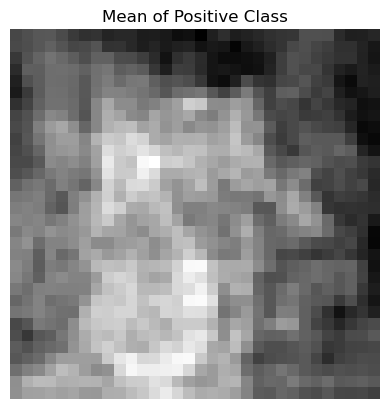

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define a simple tensor class
class Tensor:
    def __init__(self, data):
        self.data = data  # data is a numpy array

    def mean(self):
        return np.mean(self.data, axis=0)

# Tensor Fisher Discriminant Analysis
class TFDA:
    def __init__(self, tensors, labels):
        self.tensors = tensors
        self.labels = labels
        self.M_plus = None
        self.M_minus = None
        self.M = None

    def compute_means(self):
        positive_tensors = [self.tensors[i] for i in range(len(self.labels)) if self.labels[i] == 1]
        negative_tensors = [self.tensors[i] for i in range(len(self.labels)) if self.labels[i] == -1]

        if positive_tensors:
            self.M_plus = np.mean([tensor.data for tensor in positive_tensors], axis=0)
        if negative_tensors:
            self.M_minus = np.mean([tensor.data for tensor in negative_tensors], axis=0)

        all_tensors = self.tensors
        self.M = np.mean([tensor.data for tensor in all_tensors], axis=0)

# Load images from folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).resize((32, 32)).convert('L')  # Resize and convert to grayscale
        img_array = np.array(img)
        images.append(Tensor(img_array))  # Store as Tensor
        label = 1 if 'cat' in filename else -1  # Binary classification
        labels.append(label)
    return images, labels

# Plotting the means
def plot_means(tfda):
    if tfda.M_plus is not None:
        plt.figure()
        plt.imshow(tfda.M_plus, cmap='gray')
        plt.title('Mean of Positive Class')
        plt.axis('off')
        plt.show()

    if tfda.M_minus is not None:
        plt.figure()
        plt.imshow(tfda.M_minus, cmap='gray')
        plt.title('Mean of Negative Class')
        plt.axis('off')
        plt.show()

# Example usage
if __name__ == "__main__":
    folder = 'cat'  # Replace with your dataset path
    tensors, labels = load_images_from_folder(folder)

    if not tensors:
        print("No images loaded. Please check the dataset path.")
    else:
        tfda = TFDA(tensors, labels)
        tfda.compute_means()

        print("Mean of positive class:", tfda.M_plus)
        print("Mean of negative class:", tfda.M_minus)

        plot_means(tfda)
